RMSE: 41.859


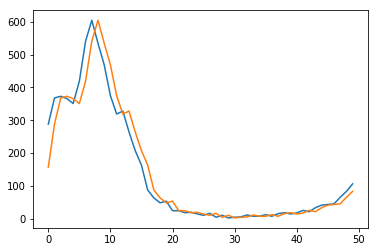

In [11]:
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

# load dataset
mydata = read_csv('C:/Users/Jason/OneDrive - QJA/My Files/NW Coursework/Predict 413 Time Series Analysis' \
    '/Casestudy/NCHSData52_flu.csv', parse_dates=[0], index_col=0, squeeze=True, header=0)
# summarize first few rows
print(mydata.head())
# line plot
mydata.plot()
pyplot.show()

# split data into train and test
X = mydata.values
train, test = X[0:-50], X[-50:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

In [12]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

       0    0
0    0.0  149
1  149.0  174
2  174.0  239
3  239.0  295
4  295.0  298


In [16]:
from pandas import read_csv
from pandas import datetime
from pandas import Series

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load dataset
mydata = read_csv('C:/Users/Jason/OneDrive - QJA/My Files/NW Coursework/Predict 413 Time Series Analysis' \
    '/Casestudy/NCHSData52_flu.csv', parse_dates=[0], index_col=0, squeeze=True, header=0)
print(mydata.head())

# transform to be stationary
differenced = difference(mydata, 1)
print(differenced.head())

# invert transform
inverted = list()
for i in range(len(differenced)):
	value = inverse_difference(mydata, differenced[i], len(mydata)-i)
	inverted.append(value)
inverted = Series(inverted)
print(inverted.head())

Date
2009-10-05    149
2009-10-12    174
2009-10-19    239
2009-10-26    295
2009-11-02    298
Name: Influenza Deaths, dtype: int64
0    25
1    65
2    56
3     3
4   -33
dtype: int64
0    174
1    239
2    295
3    298
4    265
dtype: int64


In [28]:
from pandas import read_csv
from pandas import datetime
from pandas import Series
from sklearn.preprocessing import MinMaxScaler


# transform scale
X = mydata.values
X = X.reshape(len(X),1)


In [29]:
X

array([[ 149],
       [ 174],
       [ 239],
       [ 295],
       [ 298],
       [ 265],
       [ 208],
       [ 179],
       [ 126],
       [ 105],
       [  84],
       [  63],
       [  47],
       [  37],
       [  39],
       [  28],
       [  29],
       [  27],
       [  38],
       [  23],
       [  30],
       [  28],
       [  30],
       [  29],
       [  25],
       [  28],
       [  14],
       [  13],
       [   9],
       [   7],
       [   8],
       [   4],
       [   3],
       [   2],
       [   4],
       [   5],
       [   2],
       [   3],
       [   4],
       [   3],
       [   5],
       [   3],
       [   3],
       [   1],
       [   5],
       [   3],
       [   2],
       [   2],
       [   3],
       [   4],
       [   1],
       [   6],
       [   5],
       [   7],
       [   3],
       [   5],
       [   5],
       [   3],
       [   9],
       [  13],
       [   9],
       [  13],
       [  12],
       [  18],
       [  30],
       [  53],
       [  

In [39]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print(scaled_series.head())

0   -0.726103
1   -0.680147
2   -0.560662
3   -0.457721
4   -0.452206
dtype: float64


C:\Users\Jason\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
# invert transform
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = Series(inverted_X[:, 0])
print(inverted_series.head())

0    149.0
1    174.0
2    239.0
3    295.0
4    298.0
dtype: float64


In [64]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model


In [65]:
def forecast(model, batch_size, row):
	X = row[0:-1]
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

In [66]:
testx = row[0:-1]

NameError: name 'row' is not defined

In [61]:
#Full example using all components from above

In [74]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
#	test = test.reshape(test.shape[0], test.shape[1])
#	test_scaled = scaler.transform(test)
	return scaler, train_scaled#, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
mydata = read_csv('C:/Users/Jason/OneDrive - QJA/My Files/NW Coursework/Predict 413 Time Series Analysis' \
    '/Casestudy/NCHSData52_flu.csv', parse_dates=[0], index_col=0, squeeze=True, header=0)

# transform data to be stationary
raw_values = mydata.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train = supervised_values[0:-1]
#test = supervised_values[-50:]

# transform the scale of the data
scaler, train_scaled = scale(train)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1500, 2)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)



array([[-0.33756325],
       [-0.20475017],
       [-0.2709744 ],
       [-0.259572  ],
       [-0.342495  ],
       [-0.42457065],
       [-0.4735502 ],
       [-0.40028855],
       [-0.47606635],
       [-0.38100755],
       [-0.40982503],
       [-0.39919975],
       [-0.3926621 ],
       [-0.37992835],
       [-0.35627615],
       [-0.38906047],
       [-0.3558588 ],
       [-0.3707686 ],
       [-0.33798257],
       [-0.40011632],
       [-0.33907756],
       [-0.37461406],
       [-0.35629275],
       [-0.36845985],
       [-0.37110218],
       [-0.35609755],
       [-0.39508778],
       [-0.35884896],
       [-0.37465504],
       [-0.36558068],
       [-0.36188987],
       [-0.37275997],
       [-0.3643058 ],
       [-0.36628604],
       [-0.35906827],
       [-0.36288694],
       [-0.37042394],
       [-0.3604631 ],
       [-0.36267167],
       [-0.36619988],
       [-0.35918736],
       [-0.36924008],
       [-0.36273983],
       [-0.36872807],
       [-0.35414782],
       [-0

In [79]:
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-50:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-50:])
pyplot.plot(predictions)
pyplot.show()

Month=1, Predicted=187.875140, Expected=106.000000


IndexError: index 427 is out of bounds for axis 0 with size 427